In [14]:
%pylab inline
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Fat Sphere (Ricker et al sphere :density contrast of 150, outside density 1oom lower): finished running in <1min

In [2]:
cd ~/project/FLASH4.3_2/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object


In [4]:
# cd ~/Desktop/projects/FLASH4.3_2/object/

In [28]:
def plot_dens(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
#     slc.set_zlim(physical_quantity, 5.5e-22,1.1e-19)
    slc.show()
def plot_all(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
#     slc.set_log("all", False)
#     slc.set_zlim(physical_quantity, 5.5e-22,1.1e-19)
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_zlim(physical_quantity,58,60)
#     slc.set_log("all", False)
    slc.show()


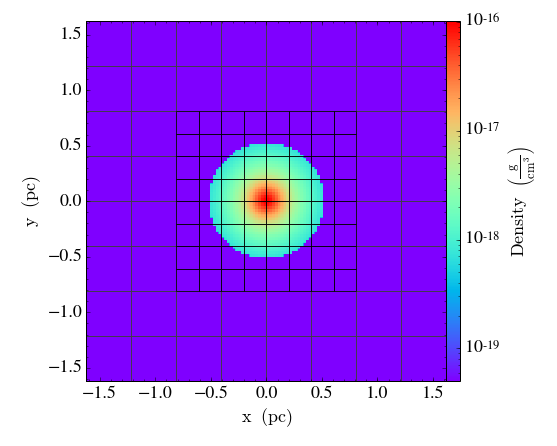


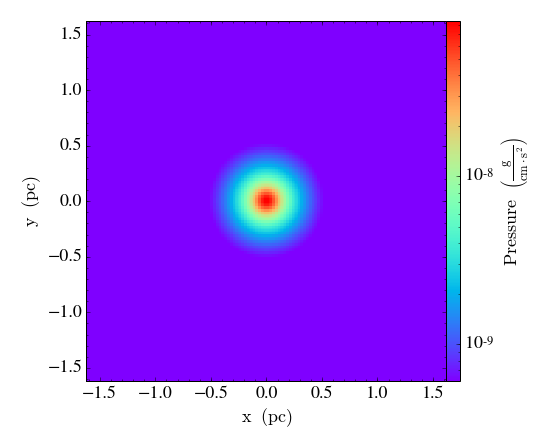


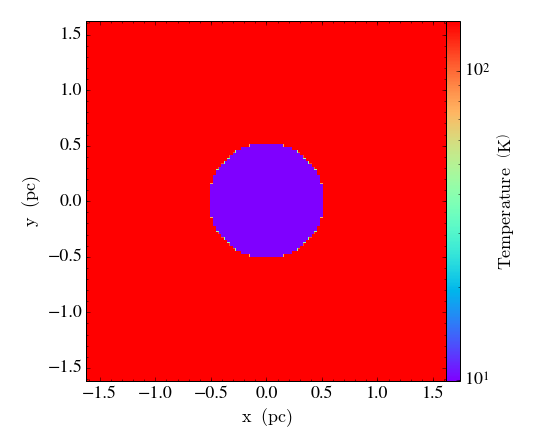

In [29]:
plot_all(0)

(1e+17, 5e+18)

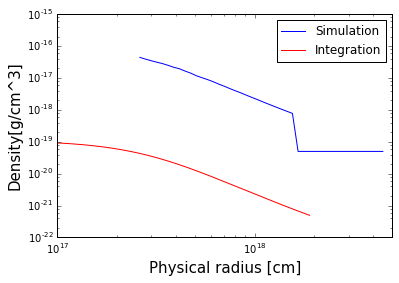

In [3]:
from scipy import integrate
from matplotlib.legend_handler import HandlerLine2D
from mpl_toolkits.axes_grid1 import AxesGrid
i =0
rho_c = 1.1E-19
# pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
plt.figure()
sp = pf.sphere(pf.domain_center, (1.5,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.loglog(rp.x.value,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 20.0
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.loglog(r,rho*rho_c,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [cm]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlim(1e17,5e18)

(1e-20, 1e-16)

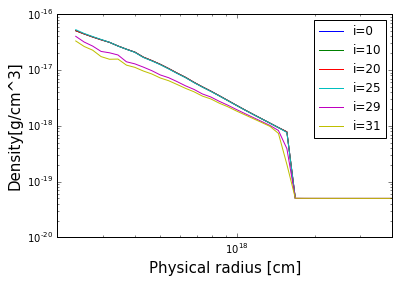

In [9]:
plt.figure()
# for i in np.arange(31):
#     if i %10 ==0 or i ==0 : 
for i in [0,10,20,25,29,31]:
        pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
        sp = pf.sphere(pf.domain_center, (10,"pc"))
        rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
        plt.loglog(rp.x.value,rp["density"].in_units("g/cm**3").value,label="i={}".format(i))
plt.xlabel("Physical radius [cm]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlim(2e17,4e18)
plt.ylim(1e-20,1e-16)

In [27]:
yt.funcs.mylog.setLevel(0) #coerce output null

In [4]:
i=0
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))

yt : [INFO     ] 2016-04-08 03:15:00,509 integer runtime parameter iprocs overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-04-08 03:15:00,509 integer runtime parameter jprocs overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-04-08 03:15:00,510 integer runtime parameter kprocs overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-04-08 03:15:00,534 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-04-08 03:15:00,534 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2016-04-08 03:15:00,535 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-04-08 03:15:00,536 Parameters: domain_right_edge         = [  1.00000000e+19   1.00000000e+19   1.00000000e+19]
yt : [INFO     ] 2016-04-08 03:15:00,537 Parameters: cosmological_simulation   = 0.0


(3e+18, 2e+19)

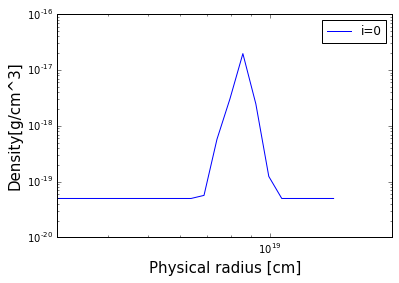

In [20]:
plt.figure()
# for i in np.arange(31):
#     if i %10 ==0 or i ==0 : 
# for i in [0,10,20,25,29,31]:
i = 0
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
sp = pf.sphere([0,0,0], (10,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.loglog(rp.x.value,rp["density"].in_units("g/cm**3").value,label="i={}".format(i))
plt.xlabel("Physical radius [cm]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlim(3e18,2e19)
# plt.ylim(1e-20,1e-16)

(6e+18, 1.3e+19)

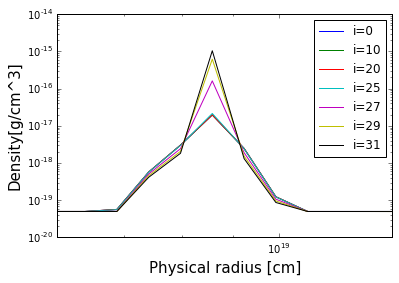

In [26]:
plt.figure()
# for i in np.arange(31):
#     if i %10 ==0 or i ==0 : 
for i in [0,10,20,25,27,29,31]:
        pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
        sp = pf.sphere([0,0,0], (5,"pc"))
        rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
        plt.loglog(rp.x.value,rp["density"].in_units("g/cm**3").value,label="i={}".format(i))
plt.xlabel("Physical radius [cm]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
# plt.xlim(2e17,4e18)
# plt.ylim(1e-20,1e-16)
plt.xlim(6e18,1.3e19)

In [7]:
print pf.domain_left_edge
print pf.domain_right_edge

[ 0.  0.  0.] code_length
[  1.00000000e+19   1.00000000e+19   1.00000000e+19] code_length


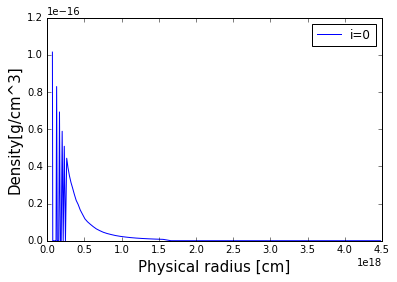

In [10]:
plt.figure()
i=0
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
sp = pf.sphere(pf.domain_center, (1.5,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value,rp["density"].in_units("g/cm**3").value,label="i={}".format(i))
plt.xlabel("Physical radius [cm]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
# plt.xlim(2e17,4e18)
# plt.ylim(1e-20,1e-16)
# plt.xlim(6e18,1.3e19)

In [ ]:
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
c = ds.find_max("density")[1]
ax = 0 # Cut through x axis
# cutting through the y0,z0 such that we hit the max density
ray = ds.ortho_ray(ax, (c[1], c[2]))
srt = np.argsort(ray['x'])
plt.loglog(np.array(ray['x'][srt]), np.array(ray['density'][srt]),label="i={}".format(timestep))
#     plt.title("Timestep {}".format(timestep),fontsize=13)
plt.xlabel("log Radius",fontsize=13)
plt.ylabel('log Density',fontsize=13)

Hitting "Nonconvergence in subroutine rieman" really fast.  So I'm making the output time smaller so maybe we will be able to see something 

In [11]:
# plt.subplot(211)
def density_radial_profile(timestep):
    ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    c = ds.find_max("density")[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['x'])
    plt.loglog(np.array(ray['x'][srt]), np.array(ray['density'][srt]),label="i={}".format(timestep))
#     plt.title("Timestep {}".format(timestep),fontsize=13)
    plt.xlabel("log Radius",fontsize=13)
    plt.ylabel('log Density',fontsize=13)

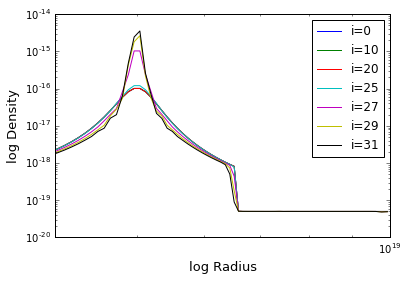

In [15]:
plt.figure()
density_radial_profile(0)
density_radial_profile(10)
density_radial_profile(20)
density_radial_profile(25)
density_radial_profile(27)
density_radial_profile(29)
density_radial_profile(31)
plt.xlim(4e18,1e19)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)


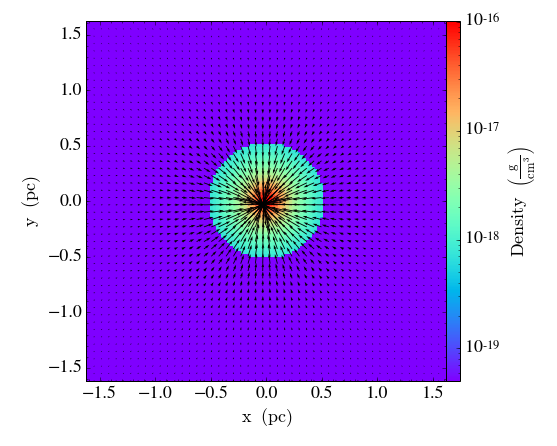

In [65]:
plot_dens(1)


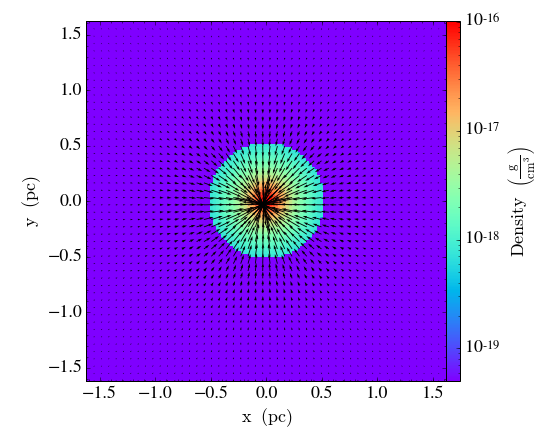

In [67]:
plot_dens(10)


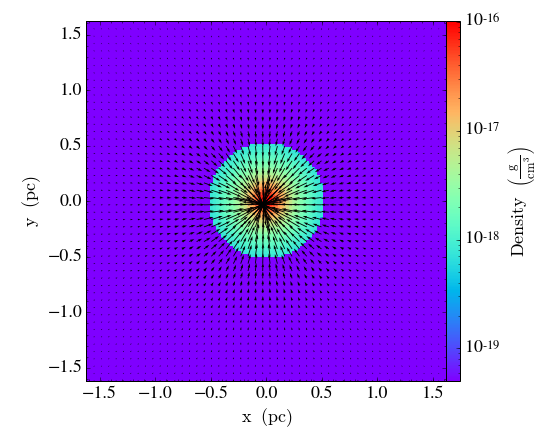

In [68]:
plot_dens(15)


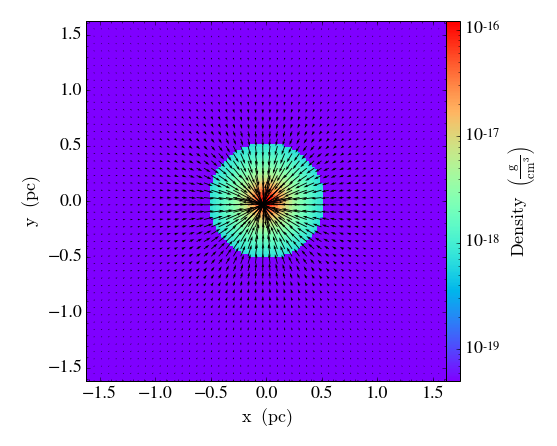

In [69]:
plot_dens(25)


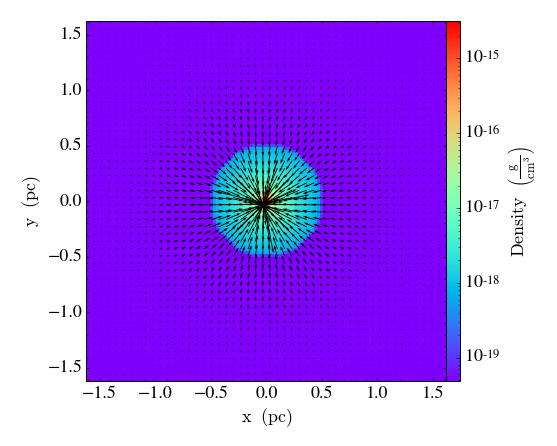

In [70]:
plot_dens(30)

sqrt(3*pi/(32*G*1e-16g/cm^3)) = 2e11 s 

code crashed at t=4.149995E+11

so this is about 2tff

In [71]:
def plot_rv(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="radial_velocity"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
#     slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
#     slc.set_zlim(physical_quantity, 5.5e-26,1.1e-19)
    slc.set_log("all", False)
    slc.show()


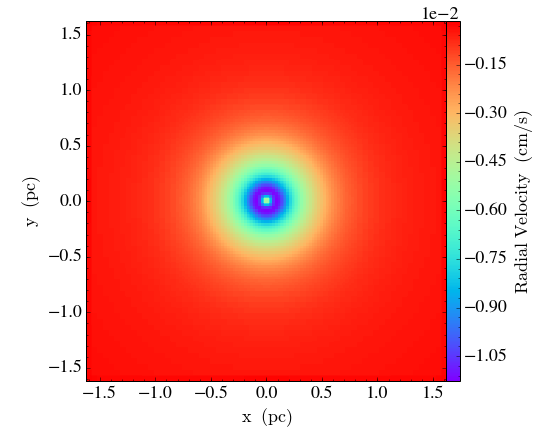


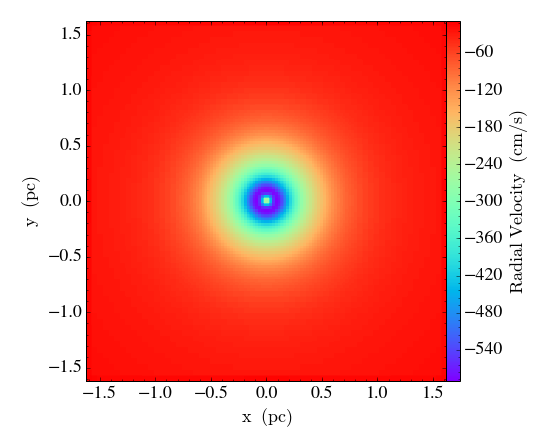


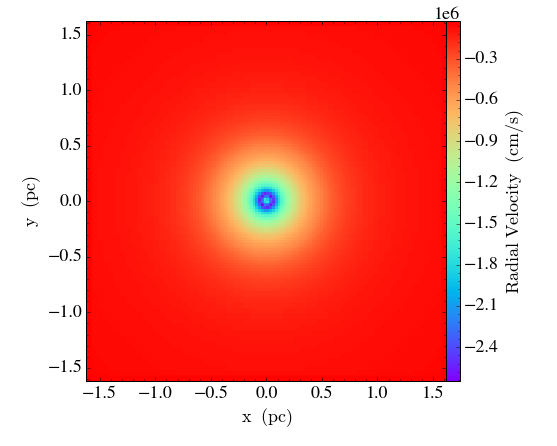

In [74]:
plot_rv(1)
plot_rv(16)
plot_rv(30)

I keep setting dt output as something smaller now its at 1.0, but then it just stalls after this, so back to 1e2. The stuff towards the end happens really fast its hard to catch them

### Note about FLASH output files 

I also think that FLASH output files work a bit differently from what we are used to in RAMSES. 
Here I kept decreasing the output times but I didn't see the t/$\Delta t$ number of outputs that I expected to see. 
I have checkpointFileIntervalTime = 1.E7 (same for plotfile) set, but it looks like in FLASH we don't have "fillers" for output files before we reach the first t=1e7. Simmilarly we don't have "fillers" for when we take larger steps. 
So really the way the files are spit out is kind of non-uniform, at least we can't expect to just derived the time back by t = $\Delta t$ *number 